## CCNSS 2018 Module 1: Neurons, synapses and networks
# Tutorial 1: Wilson-Cowan equations
[source](https://colab.research.google.com/drive/16strzPZxTEqR2owgSh6NNLlj2j7MNOQb)

Please execute the cell below to initalise the notebook environment.

In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

## Objectives
In this notebook we will introduce the *Wilson-Cowan* rate model, and use it to learn more about phase planes, nullclines, and attractors.

** Background paper:** 
* Wilson H and Cowan J (1972) Excitatory and inhibitory interactions in localized populations of model neurons. Biophysical Journal 12.


## Background

The Wilson-Cowan equations model the mean-field (i.e., average across the population) dynamics of two coupled populations of excitatory (E) and inhibitory (I) neurons:

\begin{align}
&\tau_E \frac{dE}{dt} = -E + (1 - r E) F(w_{EE}E -w_{EI}I + I_{ext};a,\theta)\\
&\tau_I \frac{dI}{dt} = -I + (1 - r I) F(w_{IE}E -w_{II}I;a,\theta)
\end{align}

$E(t)$ represents the average activation of the excitatory population, and $I(t)$ the activation of the inhibitory population. The parameters $\tau_E$ and $\tau_I$ control the timescales of each population. The connection strengths are given by: $w_{EE}$ (E to E), $w_{EI}$ (I to E), $w_{IE}$ (E to I), and $w_{II}$ (I to I). Refractory effects are modelled through the parameter $r$, and $I_{ext}$ represents external input to the excitatory population. 



The function F describes the population activation function. We assume F to be a sigmoidal function, which is parameterized by its gain $a$ and threshold $\theta$.

$$ F(x;a,\theta) = \frac{1}{1+\exp\{-a(x-\theta)\}} - \frac{1}{1+\exp\{a\theta\}}$$

The argument $x$ represents the input to the population. Note that the the second term is chosen so that $F(0;a,\theta)=0$.

To start, execute the cell below to initialise the simulation parameters.

In [2]:
dt = 0.1

# Connection weights
wEE = 12
wEI = 4
wIE = 13
wII = 11

# Refractory parameter
r = 1

# External input
I_ext = 0

# Excitatory parameters
tau_E = 1       # Timescale of excitatory population
a_E = 1.2       # Gain of excitatory population
theta_E = 2.8   # Threshold of excitatory population

# Inhibitory parameters
tau_I = 1       # Timescale of inhibitory population
a_I = 1         # Gain of inhibitory population
theta_I = 4     # Threshold of inhibitory population

**EXERCISE 1** 

Fill in the function below to define the activation function F as a function of its input x, and arguments a, and $\theta$. Verify your function by evaluating the excitatory activation function for $x = 0,3,6$. Then plot F for both E and I population parameters over $0 \leq x \leq 10$. 

[0.         0.52614443 0.94538943]


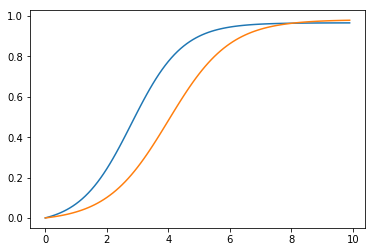

In [3]:
def F(x,a,theta): 
    """Population activation function.

    Arguments:
    x -- the population input
    a -- the gain of the function
    theta -- the threshold of the function
    
    Returns:
    y -- the population activation response
    """
    # insert your code here
    
    part1 = 1/(1 + np.exp(-a*(x-theta))) - 1/(1 +np.exp(a * theta))
    
    return part1
  
# insert your code here
#print(F(0, a_E, theta_E))
#print(F(3, a_E, theta_E))
#print(F(6, a_E, theta_E))
x = np.array([0,3,6])
print(F(x, a_E, theta_E))

#x = []
#for i in range(0, 10*100):
#    x.append(i/100)
    
#y = []
#for xi in x:
#    y.append(F(xi, a_E, theta_E))
    
x = np.arange(0,10,0.1)
y = F(x, a_E, theta_E)
y1 = F(x, a_I, theta_I)
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

#plt.plot(x, y)

**EXPECTED OUTPUT**

```
0.0
0.5261444259857104
0.9453894296980492
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E1.png)

**Exercise 2:** Fill in the function below to simulate the dynamics of the Wilson-Cowan equation for  up to $t_{max}=15$ with steps of $dt$. Remember from the LIF tutorial that we can numerically integrate the ODEs by replacing the derivatives with their discretized approximations:

\begin{align}
&\frac{dE}{dt} \to \frac{E[k+\Delta t]-E[k]}{\Delta t} \hspace{5 mm}\text{ and }\hspace{5mm}\frac{dI}{dt} \to \frac{I[k+\Delta t]-I[k]}{\Delta t}\\
\end{align}

Then simulate the dynamics of the population starting from initial condition $E_0=I_0=0.2$ and plot the results. What is the steady state solution? Then, also plot the dynamics starting from $E_0=I_0=0.25$ and plot the solution (in dashed lines). Now what is the steady state solution?

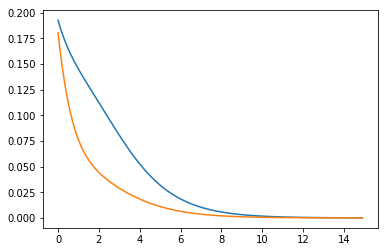

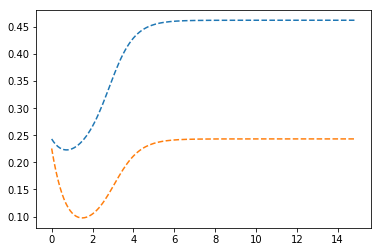

In [4]:


def simulate_wc(t,E0,I0):
    """Simulate the Wilson-Cowan equations.
   
    Arguments:
    t -- time (vector)
    E0 -- initial condition weeof the excitatory population
    I0 -- initial condition of the inhibitory population
    
    Returns:
    E -- Activity of excitatory population (vector)
    I -- Activity of inhibitory population (vector)
    """
    # insert your code here
    
    nextE = E0
    nextI = I0
    E = np.empty(t.shape)
    I = np.empty(t.shape)
    index = 0
    for ti in t:
        nextE += ((-nextE + (1- r*nextE) * F(wEE * nextE - wEI * nextI + I_ext, a_E, theta_E))* dt )/tau_E
        nextI += ((-nextI + (1- r*nextI) * F(wIE * nextE - wII * nextI, a_I, theta_I))* dt )/tau_I
        E[index] = nextE
        I[index] = nextI
        index += 1
    
    
    return E,I

# insert your code here
t = np.arange(0, 15, dt)
E, I = simulate_wc(t, 0.2, 0.2)
plt.plot(t, E)
plt.plot(t, I)
plt.show()

t = np.arange(0, 15, dt)
E, I = simulate_wc(t, 0.25, 0.25)
plt.plot(t, E, '--')
plt.plot(t, I, '--')
plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E2.png)

**Exercise 3:** Now use the same function to simulate the Wilson Cowan equations for different initial conditions from $0.01 \leq E_0 \leq 1$ and $0.01 \leq I_0 \leq 1$ with stepsize 0.1. For each initial condition, find the steady state value to which $E$ and $I$ converge. There are several ways to do this. A simple way to do this is to check, for each initial condition, that the last two points in the simulation are within 1% of each other:

$$ \frac{E(t_{max})-E(t_{max}-dt)}{E(t_{max})} \leq 0.01 $$

Use the following code within your for loops to throw an error in case the trajectories have not converged:
``raise ValueError('Has not converged.')``

Then you can just keep increasing $t_{max}$ until every initial condition converges. Plot the steady state values ($E$ vs. $I$)  What fixed points do you see?

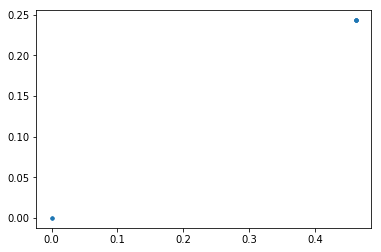

In [5]:
# insert your code here
t_max = 100

def stable_point(E0, I0):
    t = np.arange(0, t_max, dt)
    E, I = simulate_wc(t, E0, I0)
    
    if np.abs(E[-1] - E[-2])/np.abs(E[-1]) < 0.01:
        return E[-1], I[-1]
    else:
        raise ValueError('Has not converged.')
        

        
e0 = np.arange(0.01, 1, 0.1)
i0 = np.arange(0.01, 1, 0.1)

e = []
i = []
for k in range(len(e0)):
    te, ti = stable_point(e0[k], i0[k])
    e.append(te)
    i.append(ti)
    
plt.plot(e, i, '.')
    
    
    

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E3.png)

**Exercise 4**: To make the phase plane plot, we first need to determine the inverse of F. To calculate the inverse, set y = F(x), and then solve for x. Then, fill out the function below to define the inverse activation function $F^{-1}$. Check that this is the correct inverse function by testing $F^{-1}$ for $x=0,0.5,0.9$, and then plotting x against $F^{-1}(F(x))$ for $0\leq x\leq1$ (use the excitatory population parameters).

[0.         2.912066   5.00237888]


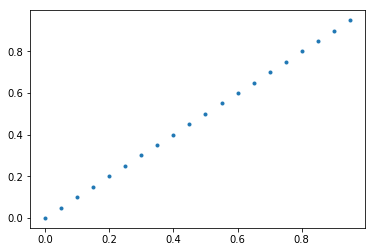

In [6]:
def F_inv(x,a,theta): 
    """Define the inverse of the population activation function.

    Arguments:
    x -- the population input
    a -- the gain of the function
    theta -- the threshold of the function
    
    Returns:
    y -- value of the inverse function
    """
    # insert your code here
    y = np.log(1/(x + 1/(1+np.exp(a*theta))) - 1) / (-a) + theta
    
    return y
  
# insert your code here
x = np.array([0, 0.5, 0.9])
print(F_inv(x, a_E, theta_E))

x = np.arange(0, 1, 0.05)
plt.plot(x, F(F_inv(x, a_E, theta_E), a_E, theta_E), '.')

**EXPECTED OUTPUT**

```
0.0
2.9120659956266
5.002378884081663
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E4.png)



**Exercise 5:** Now, derive the E and I nullclines, in terms of the inverse function $F^{-1}$. To do this, set $\frac{dE}{dt}=0$ and solve for $I$, then set $\frac{dI}{dt}=0$ and solve for $E$. Then, fill out the two functions below to calculate the I nullcline (over $-0.01 \leq I \leq 0.3$) and E nullcline (over $-0.01 \leq E \leq 0.48$). First test the value of the I nullcline for $I=0.1$, then test the E nullcline for $E=0.1$. Then use these functions to plot the nullclines in phase space (E vs. I). What fixed points do you see? Compare the intersections of the nullclines with the steady state values you observed numerically in Exercise 3.


0.04519761638072578
0.24546433162390224


/Users/yguan/miniconda3/envs/ccnss2018_students/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


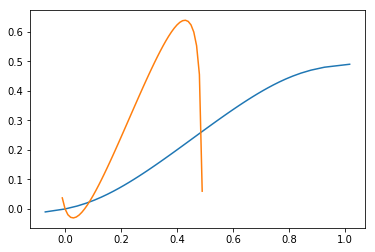

In [7]:
def get_E_nullcline(E):
    """Solve for I along the E nullcline (dE/dt = 0).
   
    Arguments:
    E -- values of E over which the nullcline is computed
    
    Returns:
    I -- values of I along the nullcline for each E
    """
    # insert your code here
    I = (wEE*E - F_inv(E/(1-r*E), a_E, theta_E))/wEI
    
    return I
  
  
def get_I_nullcline(I):
    """Solve for E along the I nullcline (dI/dt = 0).
   
    Arguments:
    I -- values of I over which the nullcline is computed
    
    Returns:
    E -- values of E along the nullcline for each I
    """
    # insert your code here
    
    E = (F_inv(I/(1-r*I), a_I, theta_I) + wII*I)/wIE
    
    return E

# insert your code here
wEE = 15
print(get_E_nullcline(0.1))
print(get_I_nullcline(0.1))

ia = np.arange(-0.01, 0.5, 0.01)
ea = np.arange(-0.01, 0.7, 0.01)
    
plt.plot(get_I_nullcline(ia), ia)
plt.plot(ea, get_E_nullcline(ea))
plt.show()

    

**EXPECTED OUTPUT**
```
0.24546433162390224
-0.029802383619274175
```

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E5.png)

**Exercise 6:** Now, on top of the nullclines, plot some sample trajectories starting with different initial conditions, for $0 \leq E_0 \leq 1$ and $0 \leq I_0 \leq 1$. How many attractors do you see?

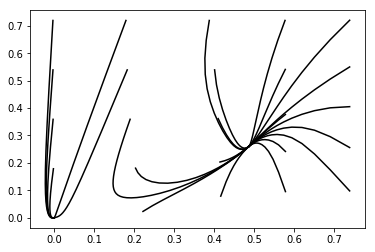

In [8]:
# insert your code here
e0v = np.arange(0, 1, 0.2)
i0v = np.arange(0, 1, 0.2)

def make_trajectory(te, ti):
    t = np.arange(0, 15, dt)
    ae, ai = simulate_wc(t,te,ti)
    plt.plot(ae, ai, 'k')

for te in e0v:
    for ti in i0v:
        make_trajectory(te, ti)

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E6.png)

**Exercise 7:** Repeat the previous exercise while varying the recurrent excitatory connectivity over the following values: $w_{EE}=5,10,12,15$. What is happening? Can you find a value of wEE where a qualitative transformation occurs? What does this tell you about how increasing recurrent connectivity affects the dynamics? 

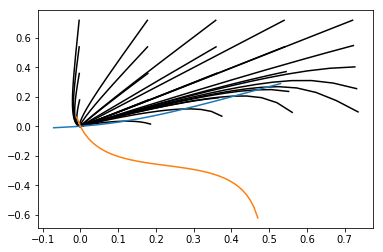

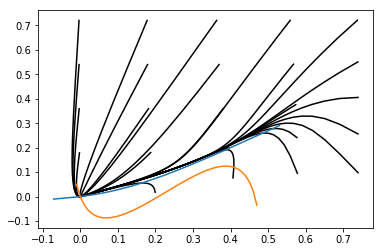

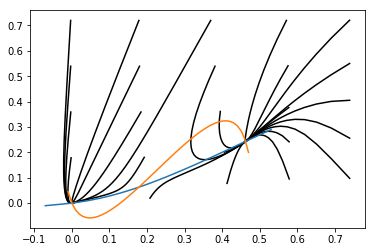

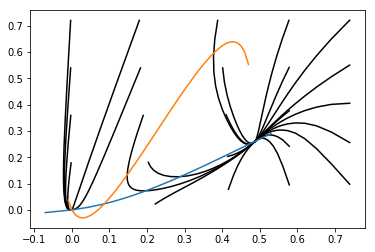

In [9]:
# insert your code here




# wEE 5
wEE = 5

e0v = np.arange(0, 1, 0.2)
i0v = np.arange(0, 1, 0.2)

def make_trajectory(te, ti):
    t = np.arange(0, 15, dt)
    ae, ai = simulate_wc(t,te,ti)
    plt.plot(ae, ai, 'k')

for te in e0v:
    for ti in i0v:
        make_trajectory(te, ti)
        
ia = np.arange(-0.01, 0.3, 0.01)
ea = np.arange(-0.01, 0.48, 0.01)
    
plt.plot(get_I_nullcline(ia), ia)
plt.plot(ea, get_E_nullcline(ea))
plt.show()

# wEE 10
wEE = 10

e0v = np.arange(0, 1, 0.2)
i0v = np.arange(0, 1, 0.2)

def make_trajectory(te, ti):
    t = np.arange(0, 15, dt)
    ae, ai = simulate_wc(t,te,ti)
    plt.plot(ae, ai, 'k')

for te in e0v:
    for ti in i0v:
        make_trajectory(te, ti)
        
ia = np.arange(-0.01, 0.3, 0.01)
ea = np.arange(-0.01, 0.48, 0.01)
    
plt.plot(get_I_nullcline(ia), ia)
plt.plot(ea, get_E_nullcline(ea))

plt.show()

# wEE 12

wEE = 12

e0v = np.arange(0, 1, 0.2)
i0v = np.arange(0, 1, 0.2)

def make_trajectory(te, ti):
    t = np.arange(0, 15, dt)
    ae, ai = simulate_wc(t,te,ti)
    plt.plot(ae, ai, 'k')

for te in e0v:
    for ti in i0v:
        make_trajectory(te, ti)
        
ia = np.arange(-0.01, 0.3, 0.01)
ea = np.arange(-0.01, 0.48, 0.01)
    
plt.plot(get_I_nullcline(ia), ia)
plt.plot(ea, get_E_nullcline(ea))

plt.show()

# wEE 15

wEE = 15

e0v = np.arange(0, 1, 0.2)
i0v = np.arange(0, 1, 0.2)

def make_trajectory(te, ti):
    t = np.arange(0, 15, dt)
    ae, ai = simulate_wc(t,te,ti)
    plt.plot(ae, ai, 'k')

for te in e0v:
    for ti in i0v:
        make_trajectory(te, ti)
        
ia = np.arange(-0.01, 0.3, 0.01)
ea = np.arange(-0.01, 0.48, 0.01)
    
plt.plot(get_I_nullcline(ia), ia)
plt.plot(ea, get_E_nullcline(ea))

plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E7a.png)
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E7b.png)
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E7c.png)
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T1E7d.png)